In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import math

The dataset used in this study is a synthetic, survey-inspired dataset obtained from Kaggle, designed to examine the impact of prolonged digital screen exposure on eye health among students and working professionals. It contains demographic information, digital usage behavior, lifestyle habits, and self-reported eye strain symptoms.

The dataset consists of multiple numerical and categorical variables, including daily screen time, sleep duration, age, break habits, blue-light filter usage, and common eye strain symptoms such as eye dryness, eye pain, headaches, and blurred vision.

An initial exploratory analysis was conducted to assess data structure, variable types, and data quality. Numerical and categorical variables were identified based on their data types. Summary statistics were used to understand central tendencies and variability, while distribution analysis was performed using histograms plots. Boxplots method was applied to identify potential outliers in numerical variables.


In [2]:
dataset = pd.read_csv(r"C:\Users\Wlink\Documents\Data_Analyst_Project\statisticproject\screentime_eyestrain\Datasets\digital_eye_strain_students_professionals.csv")
display(dataset)

,Age,Gender,Role,Daily_Screen_Hours,Break_Frequency_Per_Hour,Blue_Light_Filter_Used,Eye_Dryness_Level,Eye_Pain_Level,Headache_Frequency_Per_Week,Blurred_Vision,Sleep_Hours,Eye_Checkup_Last_Year,Digital_Eye_Strain_Risk
0,24,Male,Professional,6.8,2,Yes,6,5,6,Yes,7.5,Yes,Low
1,37,Male,Professional,3.1,0,Yes,10,9,6,No,6.1,No,Medium
2,32,Male,Student,6.0,3,Yes,2,4,6,No,6.8,Yes,Low
3,28,Male,Student,8.3,1,Yes,10,4,5,No,8.7,No,Medium
4,25,Female,Student,10.8,3,No,0,9,6,No,4.4,No,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,34,Female,Student,4.1,0,Yes,10,6,7,Yes,5.3,Yes,High
496,41,Female,Professional,6.3,0,No,2,3,0,No,6.6,No,Low
497,36,Male,Professional,12.9,1,Yes,8,0,2,Yes,4.6,Yes,Low
498,43,Male,Professional,11.2,1,No,0,3,3,No,8.3,No,Low


In [3]:
dataset.columns

Index(['Age', 'Gender', 'Role', 'Daily_Screen_Hours',
       'Break_Frequency_Per_Hour', 'Blue_Light_Filter_Used',
       'Eye_Dryness_Level', 'Eye_Pain_Level', 'Headache_Frequency_Per_Week',
       'Blurred_Vision', 'Sleep_Hours', 'Eye_Checkup_Last_Year',
       'Digital_Eye_Strain_Risk'],
      dtype='object')

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          500 non-null    int64  
 1   Gender                       500 non-null    object 
 2   Role                         500 non-null    object 
 3   Daily_Screen_Hours           500 non-null    float64
 4   Break_Frequency_Per_Hour     500 non-null    int64  
 5   Blue_Light_Filter_Used       500 non-null    object 
 6   Eye_Dryness_Level            500 non-null    int64  
 7   Eye_Pain_Level               500 non-null    int64  
 8   Headache_Frequency_Per_Week  500 non-null    int64  
 9   Blurred_Vision               500 non-null    object 
 10  Sleep_Hours                  500 non-null    float64
 11  Eye_Checkup_Last_Year        500 non-null    object 
 12  Digital_Eye_Strain_Risk      500 non-null    object 
dtypes: float64(2), int64

In [5]:
dataset.describe()
# count of all the column is 500 so there is no missing data.

,Age,Daily_Screen_Hours,Break_Frequency_Per_Hour,Eye_Dryness_Level,Eye_Pain_Level,Headache_Frequency_Per_Week,Sleep_Hours
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,30.928000,8.110000,1.480000,4.714000,5.082000,3.298000,6.423600
std,8.147612,3.470705,1.140263,3.165477,3.188041,2.321201,1.463546
min,18.000000,2.000000,0.000000,0.000000,0.000000,0.000000,4.000000
25%,24.000000,5.000000,0.000000,2.000000,2.000000,1.000000,5.175000
50%,31.000000,8.300000,1.000000,5.000000,5.000000,3.000000,6.400000
75%,38.000000,11.100000,3.000000,7.000000,8.000000,5.000000,7.800000
max,44.000000,14.000000,3.000000,10.000000,10.000000,7.000000,9.000000


In [6]:
# categorical and numerical column auto fetch
df = dataset
numerical_col = df.select_dtypes(include=['int64','float64']).columns.tolist()
print("Numerical column:")
print(numerical_col)
categorical_col = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical column:")
print(categorical_col)


Numerical column:
['Age', 'Daily_Screen_Hours', 'Break_Frequency_Per_Hour', 'Eye_Dryness_Level', 'Eye_Pain_Level', 'Headache_Frequency_Per_Week', 'Sleep_Hours']
Categorical column:
['Gender', 'Role', 'Blue_Light_Filter_Used', 'Blurred_Vision', 'Eye_Checkup_Last_Year', 'Digital_Eye_Strain_Risk']


Distribution_Analysis

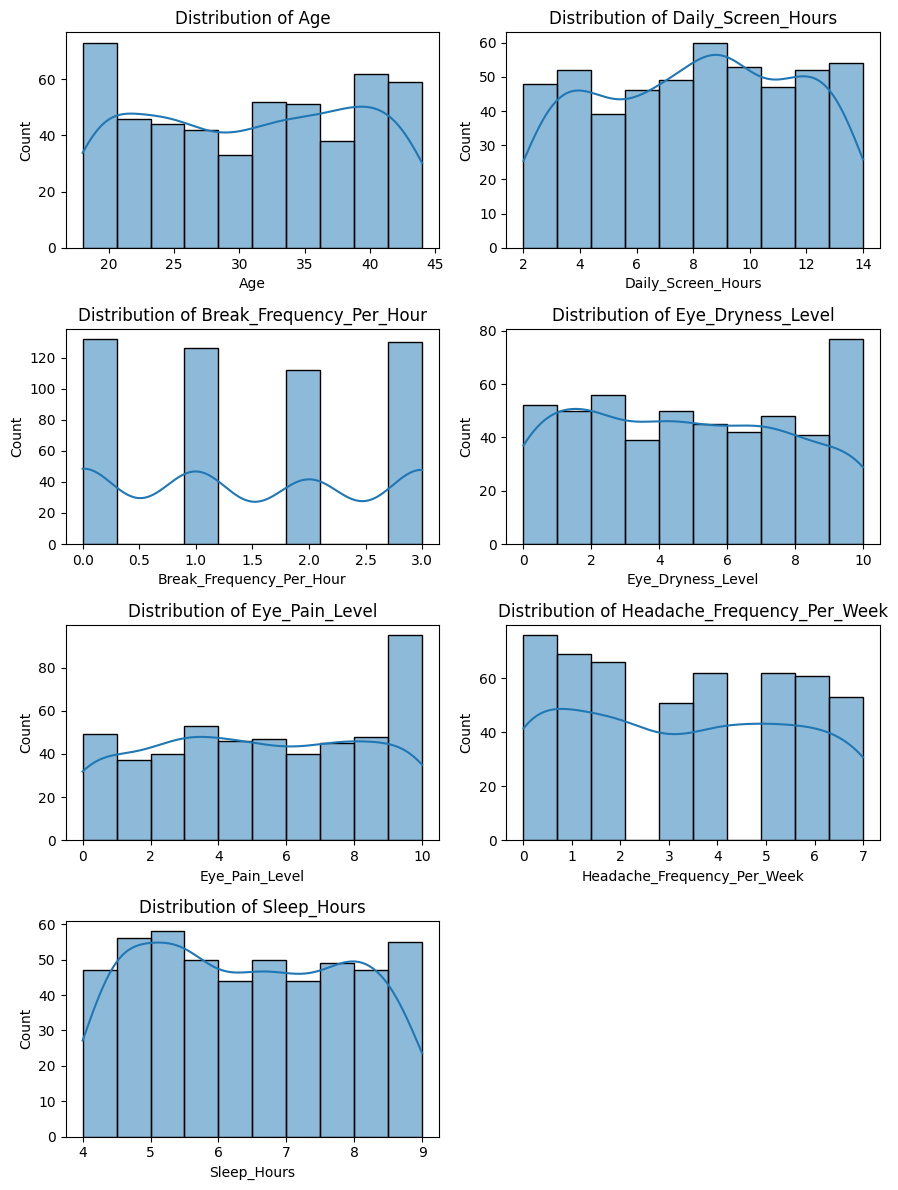

In [16]:
n_cols = 2
n_rows = math.ceil(len(numerical_col) / n_cols)

plt.figure(figsize=(9, 3 * n_rows))

for i, col in enumerate(numerical_col, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

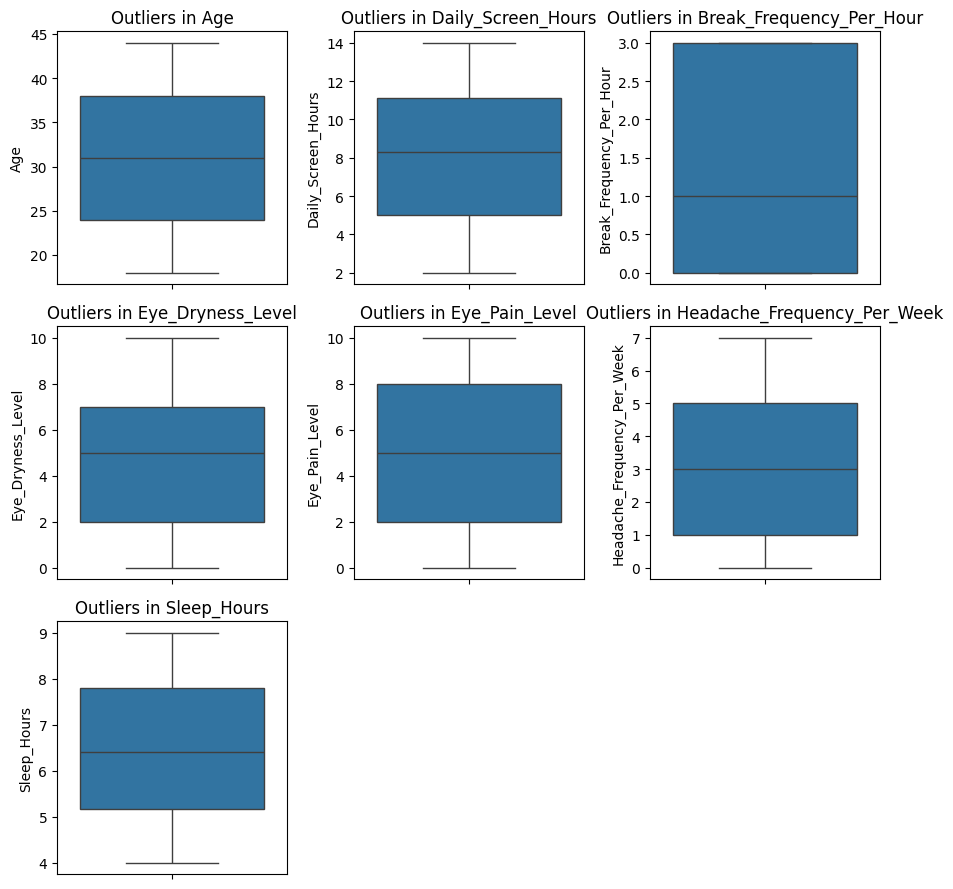

In [14]:
n_cols = 3
n_rows = math.ceil(len(numerical_col)/ n_cols)

plt.figure(figsize = (9, 3 * n_rows))

for i , col in enumerate(numerical_col,1):
    plt.subplot(n_rows,n_cols,i)
    sns.boxplot(y= df[col])
    plt.title(f'Outliers in {col}')

plt.tight_layout()
plt.show()
